In [1]:
import pickle
import numpy as np
import pandas as pd
from data import Stock
import matplotlib.cm as cm
from analysis import Analysis
import matplotlib.pyplot as plt
from hidden_markov_model import Hidden_Markov_Model

#### Data Retrieval And Display

In [2]:
sa40 = Stock('JTOPI', pd.read_csv('2015_2025_Historical_Data.csv'))
analysis = Analysis()

In [3]:
sa40.series_data

,Date,Price,Open,High,Low,Vol.,Return,Log_Return
1,2015-01-05,41990.24,43696.74,43882.81,41990.24,81.67,-0.039053,-0.039836
2,2015-01-06,42747.37,41990.24,42747.37,41983.39,78.48,0.018031,0.017870
3,2015-01-07,43086.35,42747.37,43159.91,42376.08,63.80,0.007930,0.007899
4,2015-01-08,43670.79,43086.35,43670.79,43020.22,76.25,0.013564,0.013473
5,2015-01-09,42994.58,43670.79,43785.33,42994.58,100.66,-0.015484,-0.015605
...,...,...,...,...,...,...,...,...
2494,2024-12-23,76067.93,75888.86,76277.36,75490.51,69.16,0.002360,0.002357
2495,2024-12-24,76320.99,76067.93,76588.19,75940.86,20.99,0.003327,0.003321
2496,2024-12-27,76197.46,76320.99,76603.50,75871.35,67.81,-0.001619,-0.001620
2497,2024-12-30,75427.05,76197.46,76221.20,75249.61,70.26,-0.010111,-0.010162


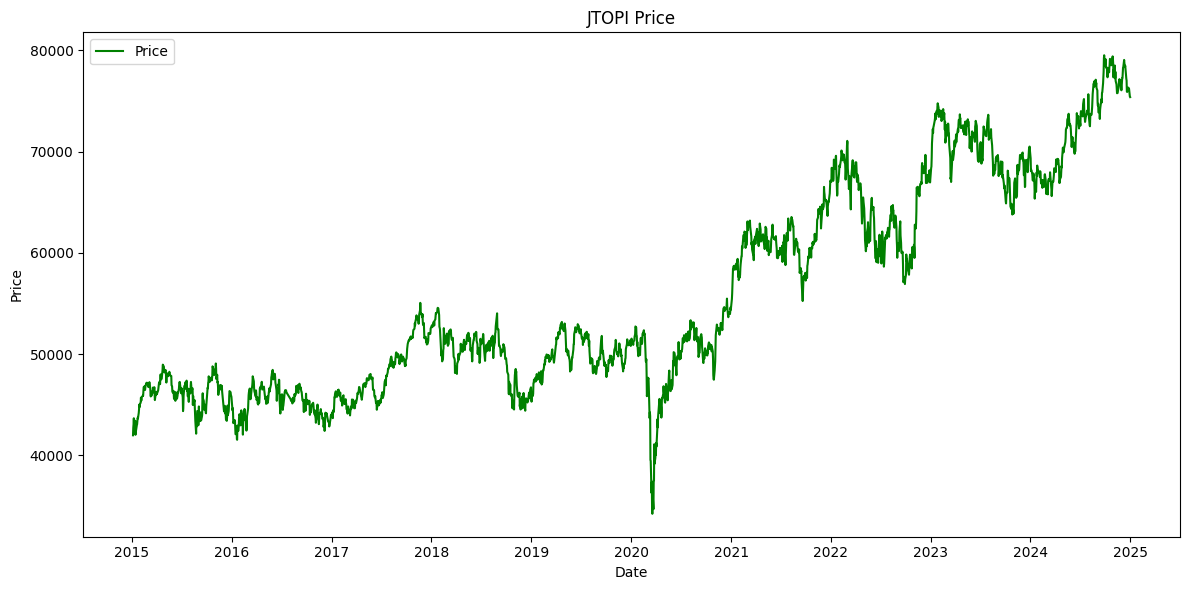

In [4]:
analysis.price_plot(sa40, 'Price')

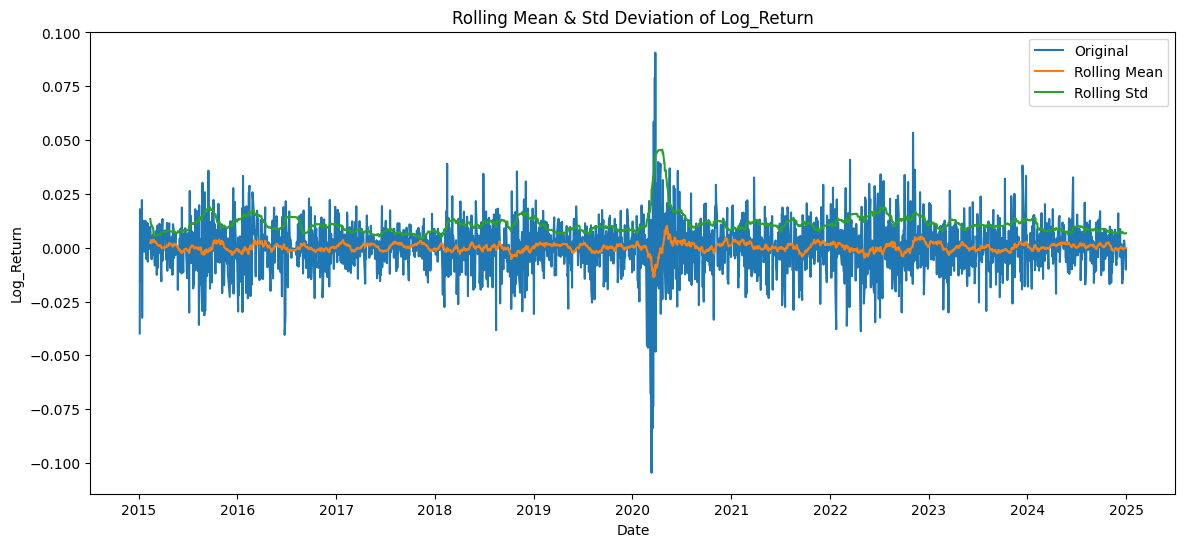

In [5]:
analysis.rolling_plot(sa40, 'Log_Return')

#### Two-State Model Specification And Training

In [6]:
two_state_model = Hidden_Markov_Model(sa40.series_data['Log_Return'].to_numpy(), 2)
two_state_model.baum_welch_algorithm(0.00001, 100)

Iteration 1 . . . Log-Likelihood = 7408.015515858744
Iteration 2 . . . Log-Likelihood = 7408.493929112361
Iteration 3 . . . Log-Likelihood = 7412.820644471862
Iteration 4 . . . Log-Likelihood = 7426.007277265651
Iteration 5 . . . Log-Likelihood = 7444.233865084803
Iteration 6 . . . Log-Likelihood = 7462.294490558519
Iteration 7 . . . Log-Likelihood = 7477.5167761186085
Iteration 8 . . . Log-Likelihood = 7489.407143549361
Iteration 9 . . . Log-Likelihood = 7498.417614096456
Iteration 10 . . . Log-Likelihood = 7505.244519544058
Iteration 11 . . . Log-Likelihood = 7510.573397413171
Iteration 12 . . . Log-Likelihood = 7514.9721030029505
Iteration 13 . . . Log-Likelihood = 7518.854535196646
Iteration 14 . . . Log-Likelihood = 7522.4924201294125
Iteration 15 . . . Log-Likelihood = 7526.049621058733
Iteration 16 . . . Log-Likelihood = 7529.61819408674
Iteration 17 . . . Log-Likelihood = 7533.246386532709
Iteration 18 . . . Log-Likelihood = 7536.9570498789035
Iteration 19 . . . Log-Likelihood 

In [7]:
two_state_model.get_parameters()

==================================== 0 =====================================
Initial Probability: 1.0
Mean: -0.00028137281203524374
Variance: 0.0003934318399244022


==================================== 1 =====================================
Initial Probability: 0.0
Mean: 0.00037625924649813445
Variance: 7.779149415716395e-05


Transition Matrix: [[0.92904842 0.07095158]
 [0.01779979 0.98220021]]
Log Likelihood: 7631.395098962984


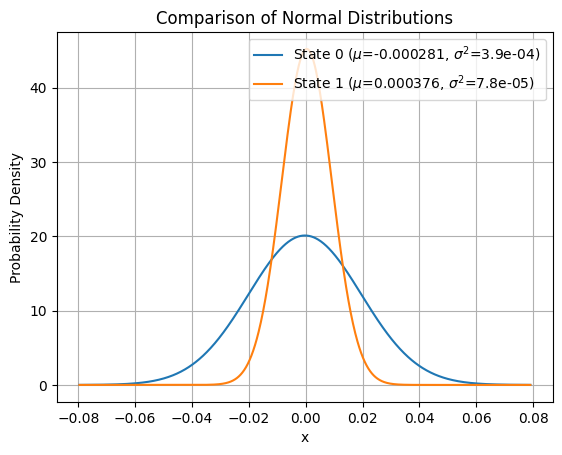

In [8]:
mean_array, variance_array = two_state_model.get_mean_variance()
analysis.plot_distributions(mean_array, variance_array)

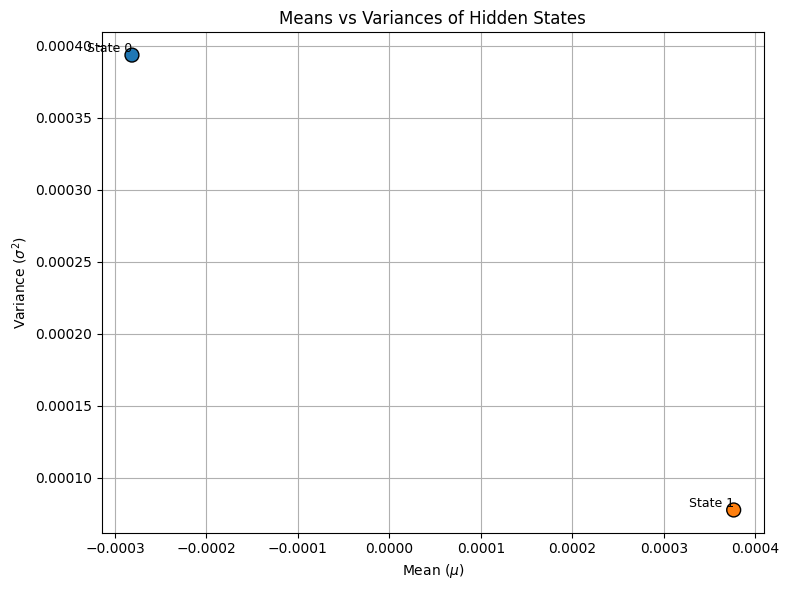

In [9]:
analysis.mean_variance_plot(mean_array, variance_array)

In [11]:
two_state_sequence = two_state_model.viterbi_algorithm()

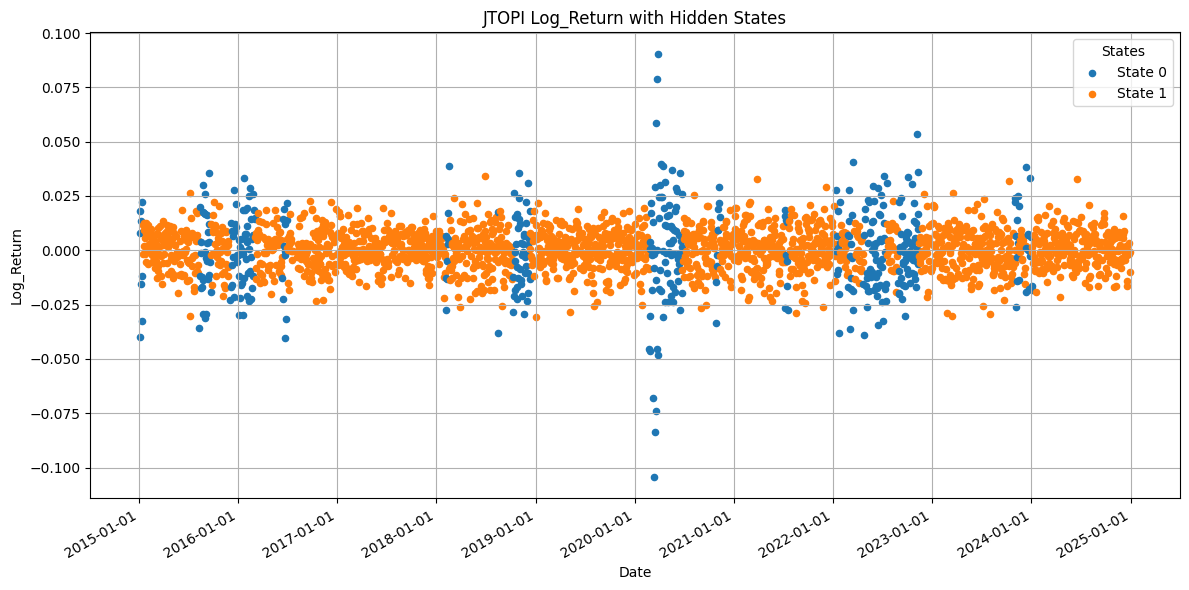

In [13]:
analysis.states_plot_points(sa40, 'Log_Return', two_state_sequence)

In [14]:
two_state_model.save_model('two_state_model')

HMM parameters saved to 'two_state_model.pkl'


#### Evaluate Model Against hmmlearn Model

In [15]:
import numpy as np
from hmmlearn import hmm

hmmlearn_two_state_model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)
hmmlearn_two_state_model.fit(sa40.series_data['Log_Return'].to_numpy().reshape(-1,1))

GaussianHMM(n_components=2, n_iter=100)

In [16]:
hmmlearn_two_state_sequence = hmmlearn_two_state_model.predict(sa40.series_data['Log_Return'].to_numpy().reshape(-1,1))

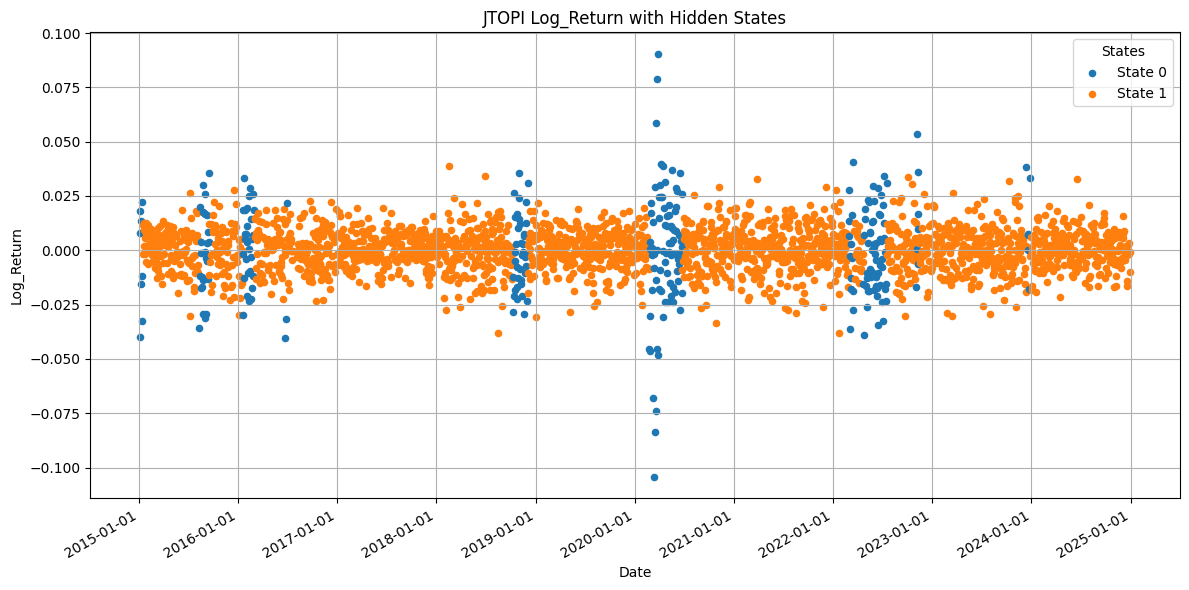

In [17]:
analysis.states_plot_points(sa40, 'Log_Return', hmmlearn_two_state_sequence)

#### Four-State Model Specification And Training

In [35]:
three_state_model = Hidden_Markov_Model(sa40.series_data['Log_Return'].to_numpy(), 3)
three_state_model.baum_welch_algorithm(0.00001, 100)

Iteration 1 . . . Log-Likelihood = 7408.015281910604
Iteration 2 . . . Log-Likelihood = 7408.297329109882
Iteration 3 . . . Log-Likelihood = 7421.350292275601
Iteration 4 . . . Log-Likelihood = 7538.1340484445645
Iteration 5 . . . Log-Likelihood = 7592.950494158182
Iteration 6 . . . Log-Likelihood = 7606.806628439455
Iteration 7 . . . Log-Likelihood = 7614.159292257556
Iteration 8 . . . Log-Likelihood = 7620.060633918005
Iteration 9 . . . Log-Likelihood = 7624.836795657708
Iteration 10 . . . Log-Likelihood = 7628.572691328081
Iteration 11 . . . Log-Likelihood = 7631.450444718226
Iteration 12 . . . Log-Likelihood = 7633.683386809293
Iteration 13 . . . Log-Likelihood = 7635.453407027317
Iteration 14 . . . Log-Likelihood = 7636.891598883312
Iteration 15 . . . Log-Likelihood = 7638.085120746284
Iteration 16 . . . Log-Likelihood = 7639.091029967809
Iteration 17 . . . Log-Likelihood = 7639.948014334269
Iteration 18 . . . Log-Likelihood = 7640.6840872150115
Iteration 19 . . . Log-Likelihood =

In [36]:
three_state_model.get_parameters()

==================================== 0 =====================================
Initial Probability: 0.0
Mean: 0.0006629597347277914
Variance: 6.122650841086628e-05


==================================== 1 =====================================
Initial Probability: 1.0
Mean: -0.004460133674495598
Variance: 0.0016667814633470853


==================================== 2 =====================================
Initial Probability: 2.965055345818378e-83
Mean: -0.00022906680830409384
Variance: 0.0002054099067548119


Transition Matrix: [[9.63204310e-01 7.45900914e-04 3.60497892e-02]
 [1.43714441e-23 9.47350845e-01 5.26491553e-02]
 [5.96516715e-02 7.38369708e-13 9.40348328e-01]]
Log Likelihood: 7687.484475956131


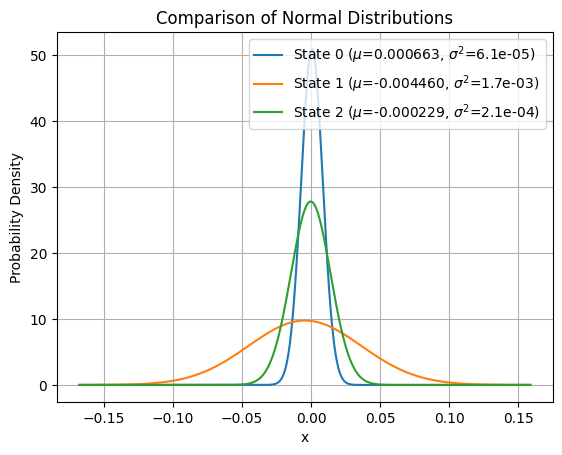

In [37]:
mean_array, variance_array = three_state_model.get_mean_variance()
analysis.plot_distributions(mean_array, variance_array)

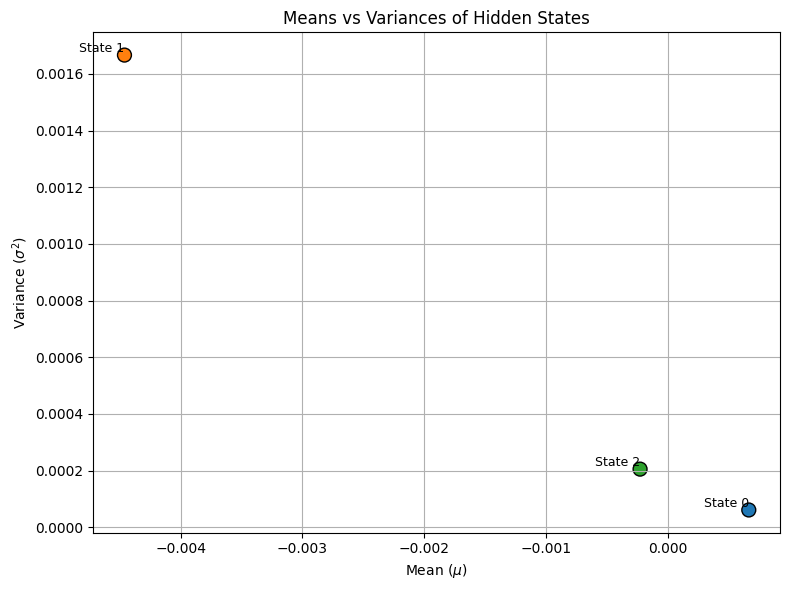

In [38]:
analysis.mean_variance_plot(mean_array, variance_array)

In [40]:
three_state_sequence = three_state_model.viterbi_algorithm()

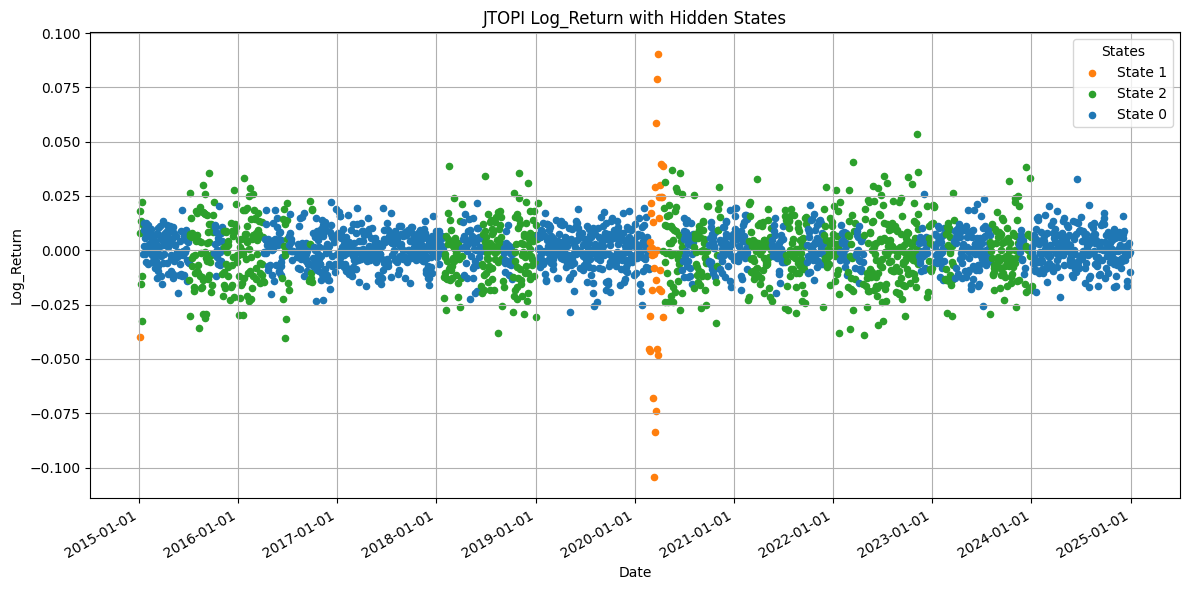

In [41]:
analysis.states_plot_points(sa40, 'Log_Return', three_state_sequence)

In [43]:
three_state_model.save_model('three_state_model')

HMM parameters saved to 'three_state_model.pkl'


#### Evaluate Model Against hmmlearn Model

In [46]:
import numpy as np
from hmmlearn import hmm

hmmlearn_three_state_model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=100)
hmmlearn_three_state_model.fit(sa40.series_data['Log_Return'].to_numpy().reshape(-1,1))

GaussianHMM(n_components=3, n_iter=100)

In [47]:
hmmlearn_three_state_sequence = hmmlearn_three_state_model.predict(sa40.series_data['Log_Return'].to_numpy().reshape(-1,1))

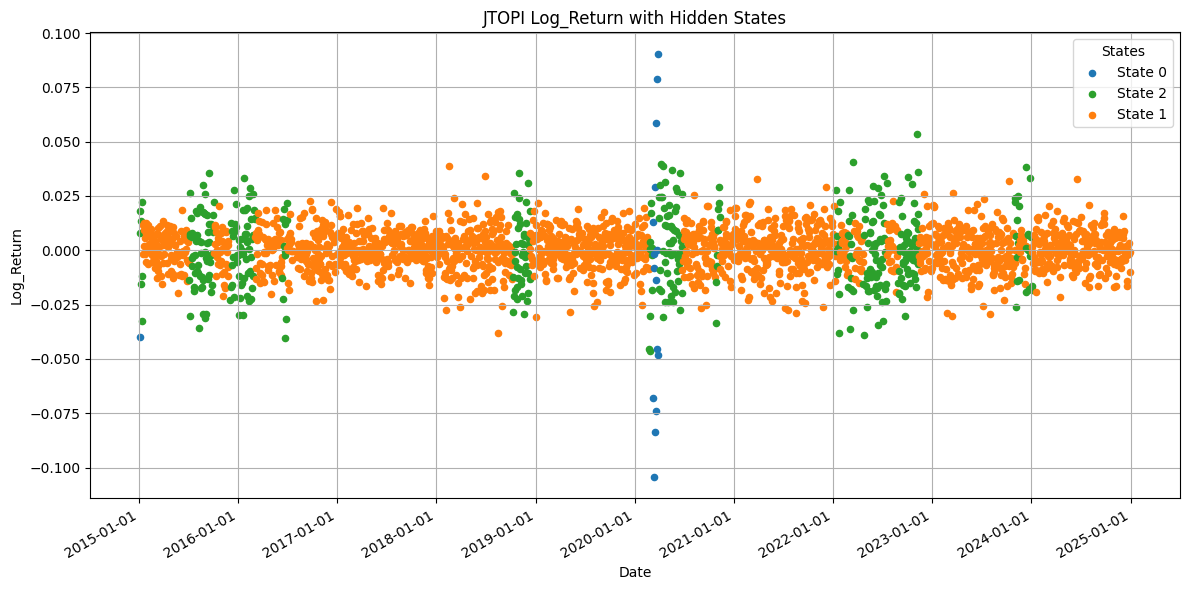

In [48]:
analysis.states_plot_points(sa40, 'Log_Return', hmmlearn_three_state_sequence)